In [1]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
from LRGSG_package.LRGSG_plots import imshow_colorbar_caxdivider, generate_maxpercdiff_colormap
from LRGSG_package.LRGSG_utils import move_to_rootf, width_interval, dv, boolean_overlap_fraction
from LRGSG_package.nx_patches import signed_spectral_layout, get_kth_order_neighbours
#
move_to_rootf(print_tf=True)

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


In [2]:
side = 30
eigenmode = 0
#
theLattice = Lattice2D(#
    side1 = side,
    geometry = 'squared',
    import_on = False,
    pflip = 0.4,
)
SLRG_obj = SignedLaplacianAnalysis(#
    system = theLattice,
    initCond = 'all_1', # f'ground_state_{eigenmode}'
    t_steps = 10,
    no_obs = 200
)
# middlenode = theLattice.N//2+theLattice.side1//2
# neg_weightsH = {(middlenode, middlenode+1): -1}
# theLattice.flip_sel_edges(neg_weightsH, 'H')
#
theLattice.flip_random_fract_edges()

In [3]:
ising_dyn = SLRG_obj.IsingDynamics(theLattice, T=1, IsingIC='uniform')
ising_dyn.init_ising_dynamics()

In [4]:
ising_dyn.run()

In [5]:
ising_dyn.find_ising_clusters()
ising_dyn.mapping_nodes_to_clusters()

In [6]:
theLattice.compute_k_eigvV()

In [7]:
theLattice.G.edges(data=True)

EdgeDataView([((0, 0), (1, 0), {'weight': -1}), ((0, 0), (0, 1), {'weight': 1}), ((0, 0), (29, 0), {'weight': -1}), ((0, 0), (0, 29), {'weight': -1}), ((0, 1), (1, 1), {'weight': -1}), ((0, 1), (0, 2), {'weight': 1}), ((0, 1), (29, 1), {'weight': -1}), ((0, 2), (1, 2), {'weight': 1}), ((0, 2), (0, 3), {'weight': 1}), ((0, 2), (29, 2), {'weight': 1}), ((0, 3), (1, 3), {'weight': 1}), ((0, 3), (0, 4), {'weight': 1}), ((0, 3), (29, 3), {'weight': 1}), ((0, 4), (1, 4), {'weight': 1}), ((0, 4), (0, 5), {'weight': -1}), ((0, 4), (29, 4), {'weight': 1}), ((0, 5), (1, 5), {'weight': -1}), ((0, 5), (0, 6), {'weight': 1}), ((0, 5), (29, 5), {'weight': -1}), ((0, 6), (1, 6), {'weight': -1}), ((0, 6), (0, 7), {'weight': -1}), ((0, 6), (29, 6), {'weight': 1}), ((0, 7), (1, 7), {'weight': 1}), ((0, 7), (0, 8), {'weight': 1}), ((0, 7), (29, 7), {'weight': 1}), ((0, 8), (1, 8), {'weight': -1}), ((0, 8), (0, 9), {'weight': 1}), ((0, 8), (29, 8), {'weight': -1}), ((0, 9), (1, 9), {'weight': -1}), ((0, 9

In [13]:
theLattice.adjacency_matrix().todense()

array([[ 0,  1,  0, ...,  0,  0,  0],
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0, -1,  0],
       [ 0,  0,  0, ..., -1,  0,  1],
       [ 0,  0,  0, ...,  0,  1,  0]])

In [14]:
theLattice.Adj.todense()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [15]:
theLattice.upd_graph_matrices()

In [16]:
theLattice.Adj.todense()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0]])

In [10]:
theLattice.Lap.todense() == theLattice.sLp.todense()

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

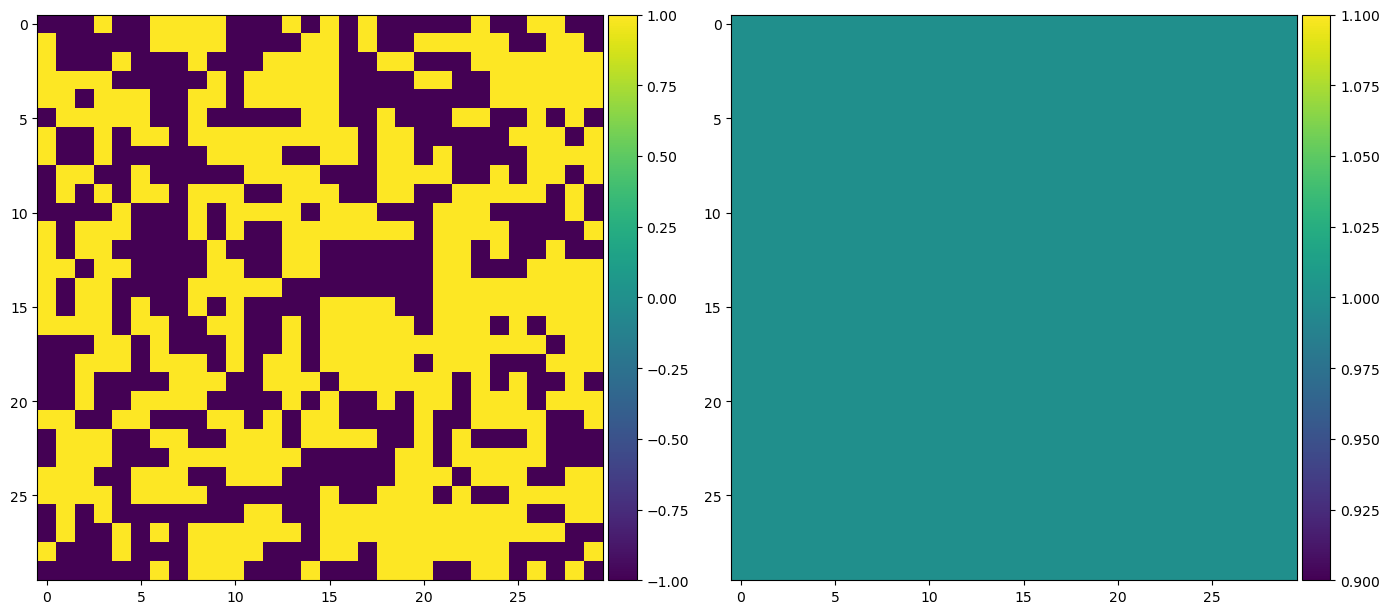

In [18]:
bineigv = -theLattice.bin_eigV()
binmagn = ising_dyn.m
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
im1 = ax[0].imshow(binmagn.reshape(theLattice.side1, theLattice.side2))
imshow_colorbar_caxdivider(im1, ax[0])
im2 = ax[1].imshow(bineigv.reshape(theLattice.side1, theLattice.side2))
imshow_colorbar_caxdivider(im2, ax[1])
fig.tight_layout()

In [7]:
boolean_overlap_fraction((bineigv > 0), (binmagn > 0))

0.4988888888888889

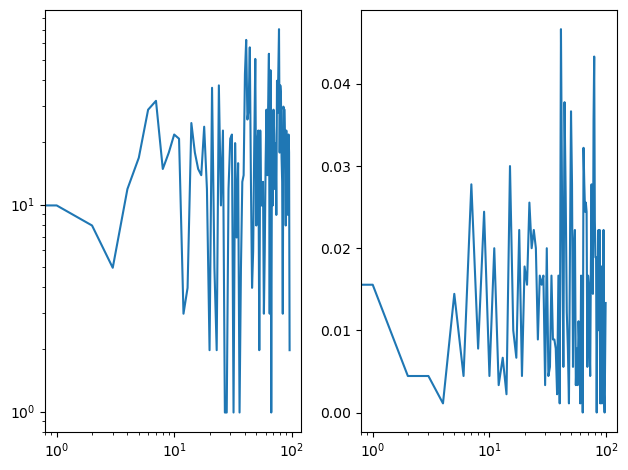

In [8]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.abs(np.roll(dv(np.array(ising_dyn.ene)), 2)[2:]))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
#
ax[1].plot(np.abs(ising_dyn.ene)/theLattice.N)
ax[1].set_xscale('log')
fig.tight_layout()


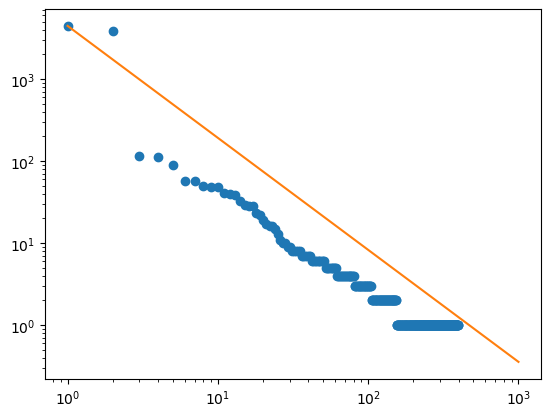

In [ ]:
# fare averages e controllare 2.05
# percolation clusters
# vedere per diverse p
# 
distr = np.unique(SLRG_obj.mapping, return_counts=True)
zipf  = sorted(distr[1], reverse=True)
plt.plot(np.linspace(1, len(zipf)+1, num=len(zipf)), zipf, 'o')
plt.plot(np.logspace(0, 3), max(zipf)*(np.logspace(0, 2))**-2.05)
# plt.hist(distr[1])
plt.yscale('log')
plt.xscale('log')

In [ ]:
bin_counts, bin_edges = np.histogram(SLRG_obj.mapping)
bin_centres = (bin_edges[:-1] + bin_edges[1:]) / 2

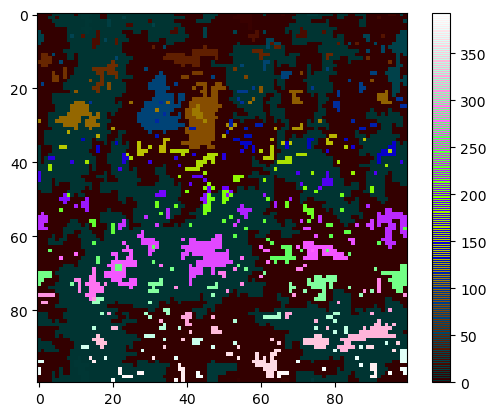

In [ ]:
def map_tuple_to_numeric(tuple_value):
    # You can use a weighted sum of the tuple elements as an example
    # Adjust the weights as needed based on your data
    weight = [0.1, 0.2, 0.5]
    numeric_value = np.sum(tuple_value * weight)
    return numeric_value


vfunc = np.vectorize(map_tuple_to_numeric)
max_diff_cmap = generate_maxpercdiff_colormap(SLRG_obj.numIsing_cl, 2)
# Apply the mapping function to the entire 'result_array'
numeric_array = vfunc(SLRG_obj.mapping)
plt.imshow(
    SLRG_obj.mapping.astype(float),
    cmap=max_diff_cmap,
)
plt.colorbar()

In [ ]:
#edge list
#indici di cluster
#inizializzazione stato
#

In [ ]:
idx0 = set(np.arange(0, SLRG_obj.system.N)) - set(sorted(SLRG_obj.biggestIsing_cl))
idx2Dcl = np.array([[i//SLRG_obj.system.side1, divmod(i, SLRG_obj.system.side2)[1]] for i in SLRG_obj.biggestIsing_cl])
idx2D = np.array([[i//SLRG_obj.system.side1, divmod(i, SLRG_obj.system.side2)[1]] for i in idx0])

In [ ]:
idx2D = idx2D[:, 0], idx2D[:, 1]
idx2Dcl = idx2Dcl[:, 0], idx2Dcl[:, 1]

In [ ]:

sum(SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)[idx2Dcl])/len(SLRG_obj.magn_array[SLRG_obj.biggestIsing_cl])

-0.7109227871939736

In [ ]:
SLRG_obj.magn_array[SLRG_obj.biggestIsing_cl]

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
a = SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)[idx2Dcl]

In [ ]:


SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2)[idx2D] = 0

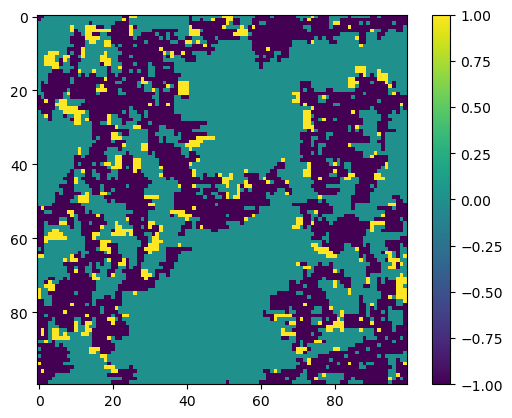

In [ ]:
plt.imshow(SLRG_obj.magn_array.reshape(SLRG_obj.system.side1, SLRG_obj.system.side2))
plt.colorbar()

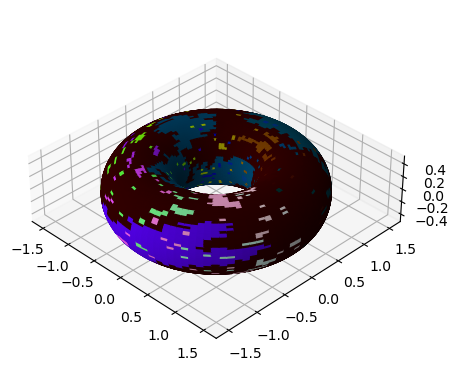

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib

# random colors
theta_dim, phi_dim = 100, 100
a = SLRG_obj.mapping.astype(float)

# Generating Torus Mesh
angle = np.linspace(0, 2 * np.pi, 100)
theta, phi = np.meshgrid(angle, angle)
r, R = .5, 1
X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# compute the indexes
t = np.floor(theta / (2 * np.pi) * (theta_dim - 1)).astype(int)
p = np.floor(phi / (2 * np.pi) * (phi_dim - 1)).astype(int)
# extract the color value from the matrix
colors = a[t, p]
# apply a colormap to the normalized color values
norm = Normalize(vmin=colors.min(), vmax=colors.max())
cmap = max_diff_cmap#matplotlib.colormaps.get_cmap("viridis")
normalized_colors = cmap(norm(colors))

fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(X, Y, Z, rstride = 1, cstride = 1, facecolors=normalized_colors)
ax.set_aspect("equal")
ax.view_init(elev=35., azim=-45)
plt.show()